# Zomato Restaurants Review Prediction <br>
By: Aman Manocha <br>
Roll Number: 015001 <br>


# **Import libraries**

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import io
import string
import re
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import string
import numpy as np
from collections import Counter
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## **Reading datasets**

### Restaurant Review data

In [134]:
reviews = pd.read_csv('Restaurant reviews.csv')


In [135]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [136]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [137]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [138]:
reviews['Restaurant'].value_counts()

Feast - Sheraton Hyderabad Hotel    100
Delhi-39                            100
Tandoori Food Works                 100
Hunger Maggi Point                  100
Pista House                         100
                                   ... 
Hitech Bawarchi Food Zone           100
Biryanis And More                   100
The Lal Street - Bar Exchange       100
Prism Club & Kitchen                100
T Grill                             100
Name: Restaurant, Length: 100, dtype: int64

In [139]:
reviews.describe

<bound method NDFrame.describe of             Restaurant              Reviewer  ...             Time Pictures
0      Beyond Flavours     Rusha Chakraborty  ...  5/25/2019 15:54        0
1      Beyond Flavours  Anusha Tirumalaneedi  ...  5/25/2019 14:20        0
2      Beyond Flavours       Ashok Shekhawat  ...  5/24/2019 22:54        0
3      Beyond Flavours        Swapnil Sarkar  ...  5/24/2019 22:11        0
4      Beyond Flavours                Dileep  ...  5/24/2019 21:37        0
...                ...                   ...  ...              ...      ...
9995  Chinese Pavilion      Abhishek Mahajan  ...    6/5/2016 0:08        0
9996  Chinese Pavilion        Sharad Agrawal  ...   6/4/2016 22:01        0
9997  Chinese Pavilion             Ramandeep  ...   6/3/2016 10:37        3
9998  Chinese Pavilion       Nayana Shanbhag  ...  5/31/2016 17:22        0
9999  Chinese Pavilion      Bhargava Krishna  ...  5/31/2016 16:41        6

[10000 rows x 7 columns]>

### Restaurant Name Data

In [140]:
rest_name_info = pd.read_csv("Restaurant names and Metadata.csv")



In [141]:
rest_name_info.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [142]:
rest_name_info.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [143]:
rest_name_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


##Data Exploration and Preprocessing

In [144]:
# Convert object type to string
reviews["Metadata"] = reviews["Metadata"].astype("str")

In [145]:
# Split No_of_Reviews and No_of_Followers Column
reviews[['No_of_Reviews','No_of_Followers']] = reviews["Metadata"].str.split("," , expand=True)

del reviews["Metadata"]
reviews[:3]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54,0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20,0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54,0,2 Reviews,3 Followers


In [146]:
# Delete characters and converting into numeric data type

reviews['No_of_Reviews'] = pd.to_numeric(reviews['No_of_Reviews'].str.replace(r'\D+', ''))
reviews['No_of_Followers'] = pd.to_numeric(reviews['No_of_Followers'].str.replace(r'\D+', '')) 
reviews[:3]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54,0,2.0,3.0


In [147]:
# Replace null values with 0 and converting column to int data type
reviews["No_of_Followers"] = reviews["No_of_Followers"].replace(np.nan, 0)
reviews["No_of_Followers"] = reviews["No_of_Followers"].astype("int")

In [148]:

trer = reviews.groupby("Restaurant")["No_of_Reviews"].agg("sum").reset_index().sort_values(by = "No_of_Reviews", ascending = False)
trer_10 = trer[:10]
trer_10

,Restaurant,No_of_Reviews
55,Labonel,6628.0
68,Pista House,5429.0
20,Chinese Pavilion,5409.0
31,Dunkin' Donuts,5289.0
89,The Old Madras Baking Company,5127.0
22,Collage - Hyatt Hyderabad Gachibowli,4764.0
19,Cascade - Radisson Hyderabad Hitec City,4444.0
44,Hyderabadi Daawat,4412.0
33,Faasos,4392.0
30,Driven Cafe,4378.0


### Top 10 Reviewed Restaurants

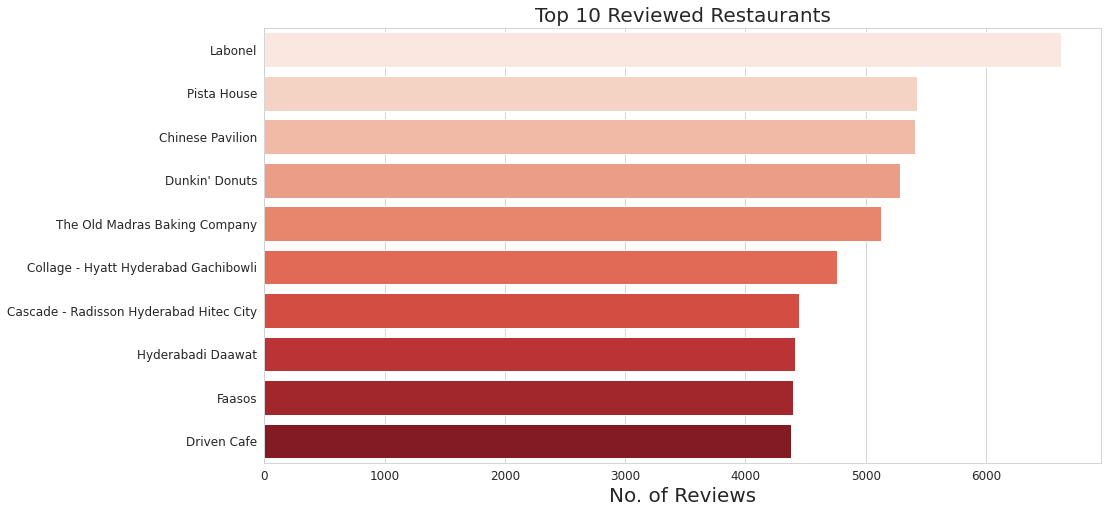

In [216]:
plt.figure(figsize = (15,8))
sns.barplot(x = "No_of_Reviews", y = "Restaurant", data = trer_10, palette = "Reds")
plt.title("Top 10 Reviewed Restaurants", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("No. of Reviews", size = 20)
plt.ylabel(None)
plt.savefig("Top_10_Reviewed_Restaurants.png")
plt.show()

### **Top 20 word frequencies for Reviews**

In [152]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [153]:
Stopwords = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

reviews['Review'] =reviews['Review'].apply(lambda text: cleaning_stopwords(text))
reviews['Review'].head()

0    The ambience good, food quite good . Saturday ...
1    Ambience good pleasant evening. Service prompt...
2    A must try.. great food great ambience. Thnx s...
3    Soumen das Arun great guy. Only behavior since...
4    Food good.we ordered Kodi drumsticks basket mu...
Name: Review, dtype: object

In [154]:
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

reviews['Review'] = reviews['Review'].apply(lambda x: cleaning_punctuations(x))
reviews['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

In [155]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

reviews['Review'] = reviews['Review'].apply(lambda x: cleaning_repeating_char(x))
reviews['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

In [156]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

reviews['Review'] = reviews['Review'].apply(lambda x: cleaning_numbers(x))
reviews['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

### **Top 20 Two-word Frequencies**

In [157]:
# Joining together two-words which were coming frequently
text = ' '.join(reviews["Review"])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [158]:
two_words_df = pd.DataFrame(two_words.items(), columns=['Reviews Words', 'Frequency'])
two_words_df = two_words_df.sort_values(by = "Frequency", ascending = False)
two_words_20 = two_words_df[:20]
two_words_20

,Reviews Words,Frequency
2771,I ordered,571
541,The food,471
283,We ordered,408
1387,main course,387
196,really good,377
1031,This place,358
231,food good,330
71,visit place,316
39,must try,306
517,The place,277


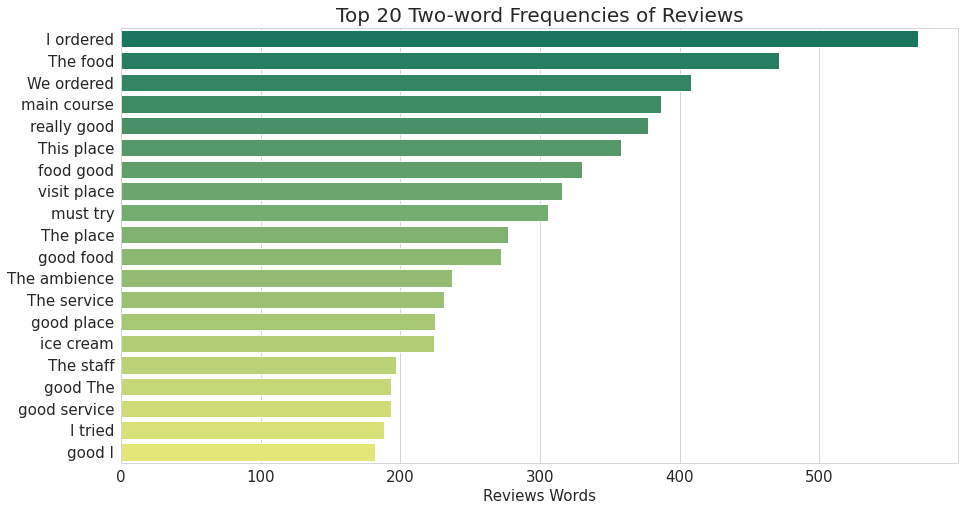

In [159]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 8))
sns.barplot(y = "Reviews Words", x = "Frequency", data = two_words_20, palette = "summer")
plt.title("Top 20 Two-word Frequencies of Reviews", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Reviews Words", size = 15)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Reviews.png")
plt.show()

### **Top 20 word frequencies for Cusines**

In [160]:
# Stopwords
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda text: cleaning_stopwords(text))
rest_name_info['Cuisines'].head()

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object

In [161]:
# Removing Punctuations
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_punctuations(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

In [162]:
# Removing repeating characters
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

In [163]:
# Removing Numeric numbers
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_numbers(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

### **Top 20 Two-word Frequencies of Cuisines**

In [164]:
# Frequently coming two-words joined together
text = ' '.join(rest_name_info['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [165]:
# top 20 two-words 
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine Words,Frequency
6,North Indian,61
9,Indian Chinese,27
42,Fast Food,15
4,South Indian,9
5,Indian North,9
33,Chinese North,8
24,Indian Continental,6
65,Italian North,6
8,Biryani North,6
28,Food North,6


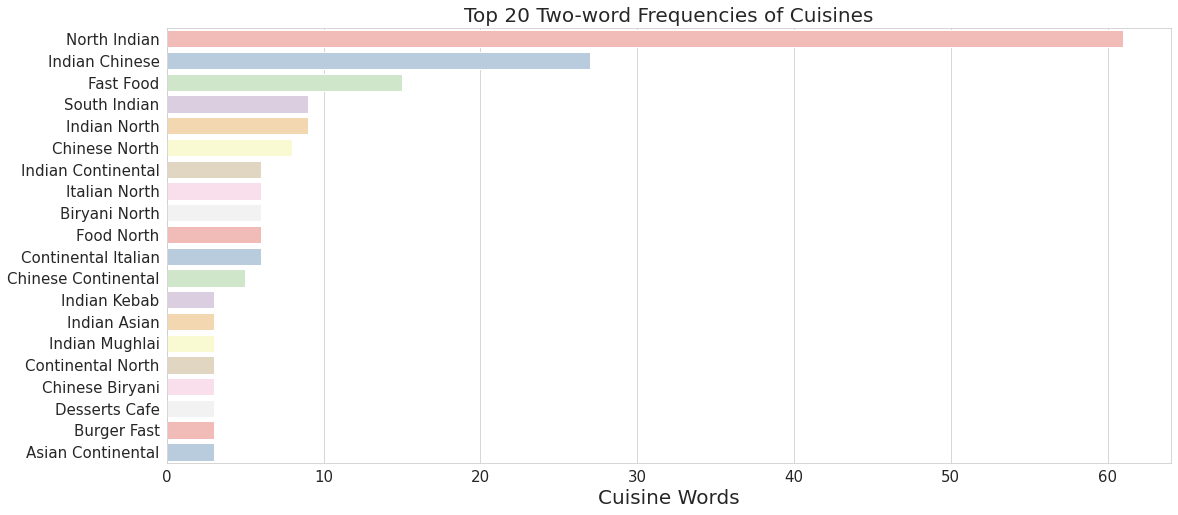

In [166]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "Pastel1")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

In [167]:
reviews.shape

(10000, 8)

In [168]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       10000 non-null  object 
 1   Reviewer         9962 non-null   object 
 2   Review           10000 non-null  object 
 3   Rating           9962 non-null   object 
 4   Time             9962 non-null   object 
 5   Pictures         10000 non-null  int64  
 6   No_of_Reviews    9962 non-null   float64
 7   No_of_Followers  10000 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [169]:
reviews =reviews.dropna()

In [170]:
reviews.shape

(9962, 8)

In [171]:
# Reviews and rating file
reviews_txt = reviews[['Review', 'Rating']]
reviews_txt.head()

,Review,Rating
0,The ambience good food quite good Saturday lu...,5
1,Ambience good pleasant evening Service prompt ...,5
2,A must try great food great ambience Thnx serv...,5
3,Soumen das Arun great guy Only behavior sincer...,5
4,Food goodwe ordered Kodi drumsticks basket mut...,5


In [172]:
# Typecasting and replacing
reviews_txt['Rating'] = reviews_txt['Rating'].replace('Like', 5)
reviews_txt['Rating'] = reviews_txt['Rating'].astype('float')

In [173]:
# Converted rating in two srings
reviews_txt['Rating'] = np.where(reviews_txt['Rating']<4, 0, 1) #0 for BAD rating and 1 for Good rating

In [174]:
reviews_txt.head()

,Review,Rating
0,The ambience good food quite good Saturday lu...,1
1,Ambience good pleasant evening Service prompt ...,1
2,A must try great food great ambience Thnx serv...,1
3,Soumen das Arun great guy Only behavior sincer...,1
4,Food goodwe ordered Kodi drumsticks basket mut...,1


In [175]:
# Bad and good rating
reviews_txt['Rating'].value_counts()

1    6275
0    3687
Name: Rating, dtype: int64

In [176]:
# Bad and good rating with respect to restaurants
reviews['Restaurant'].value_counts()

Feast - Sheraton Hyderabad Hotel    100
Royal Spicy Restaurant              100
Hunger Maggi Point                  100
Pista House                         100
AB's - Absolute Barbecues           100
                                   ... 
The Lal Street - Bar Exchange       100
Prism Club & Kitchen                100
T Grill                             100
Arena Eleven                         85
American Wild Wings                  77
Name: Restaurant, Length: 100, dtype: int64

# **Data Visualization**

In [177]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'No_of_Reviews', 'No_of_Followers'],
      dtype='object')

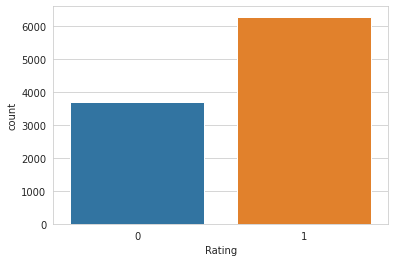

In [178]:
# Count of good and bad rating
sns.countplot(reviews_txt['Rating']) 

In [179]:
reviews=reviews[reviews['Rating']!='Like']

Since 'like' is not convertible to a number so it is omitted

In [180]:
rest_name_info['Cost']=pd.to_numeric(rest_name_info['Cost'].str.replace(',',''))
rest_name_info.dtypes

Name           object
Links          object
Cost            int64
Collections    object
Cuisines       object
Timings        object
dtype: object

## **Cuisines variety analysis**

In [181]:
# 10 cuisines that are most presents 

cuisine_list =rest_name_info .Cuisines.str.split(', ') 
cuis_list = {} 
for names in cuisine_list: 
    for name in names: 
        if (name in cuis_list): 
            cuis_list[name]+=1 
        else:  
            cuis_list[name]=1 
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) 
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) 
top_10_cuis = cuis_df[0:10] 


Text(0.5, 1.0, 'Most popular cuisines at Restaurants in Hyderabad')

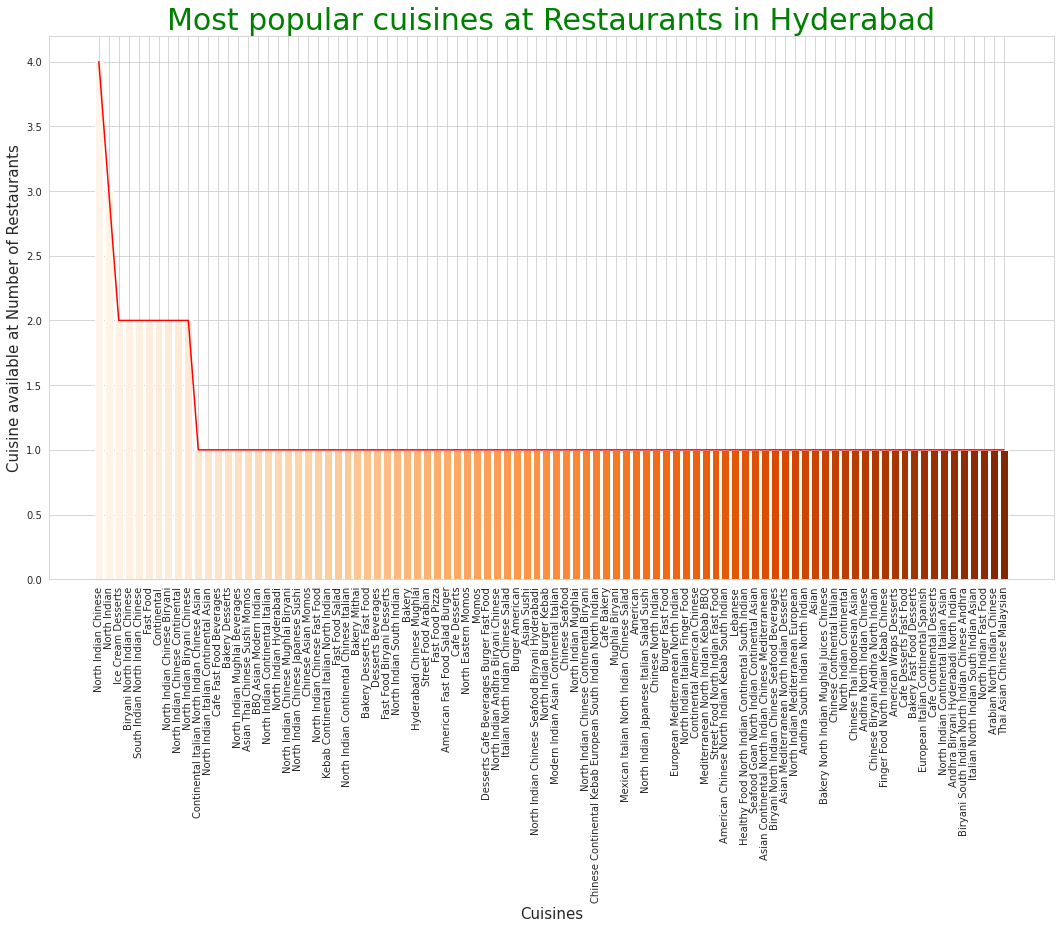

In [182]:
# Most popular cuisines at restaurants in Hyderabad
plt.figure(figsize=(18,10))
plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='red')
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color= sns.color_palette("Oranges",len (cuis_df.index)))
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Most popular cuisines at Restaurants in Hyderabad',size=30, color = 'green')

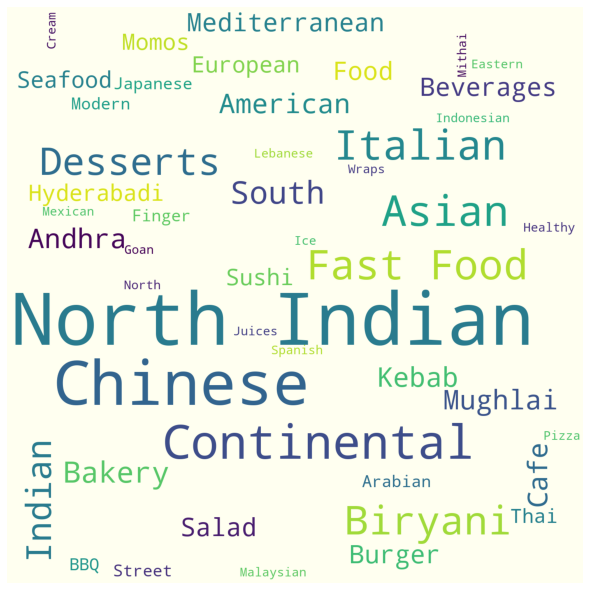

In [183]:
# Most nominated words in the cuisine feature
from wordcloud import WordCloud, STOPWORDS
words_list = cuis_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='ivory',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

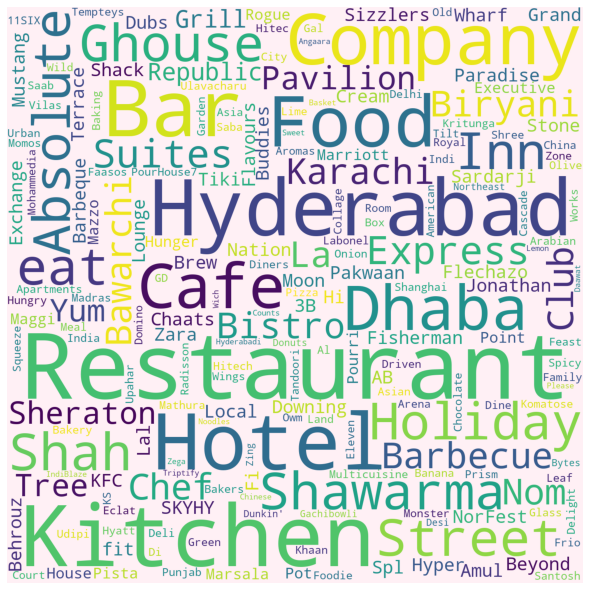

In [184]:
# Most nominated words in the 'Name' feature
Rests = rest_name_info.Name.unique()
rest_string = ' '
for i in Rests:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## **Top 15 Reviewer**

In [185]:
# Extrapolating
reviewer_list = reviews.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review Count')
reviewer_list = reviewer_list.sort_values(by = 'Review Count',ascending=False)
top_reviewers = reviewer_list[:15]

Text(0, 0.5, 'N° of reviews')

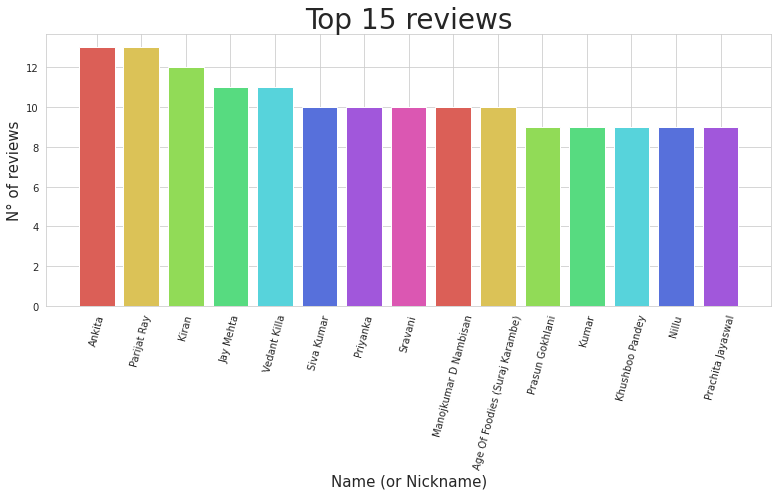

In [186]:
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel('Name (or Nickname)',size=15)
plt.ylabel('N° of reviews',size=15)

## **Most common words in reviews**

In [187]:
import spacy

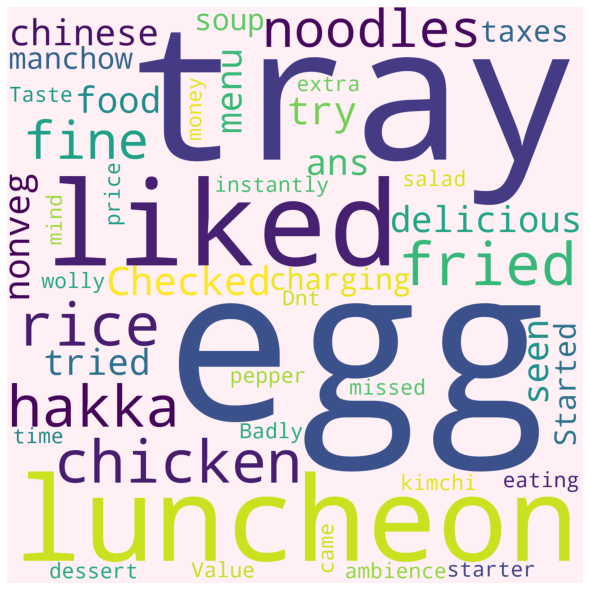

In [188]:
# Most common words
nlp = spacy.load('en')
reviews_feature = reviews['Review']
for review in reviews_feature:
    doc = nlp(review)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 
  
# WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [189]:
cleanup_re = re.compile('[^a-z]+')
def clean(sentence): 
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ', sentence).strip()
  return sentence
reviews_txt['Review'] = reviews_txt['Review'].apply(clean)

In [190]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [191]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [192]:
def preprocess(sentence):
  sentence = str(sentence)
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  sentence = ' '.join([i for i in word_tokens if not i in stop_words])
  return sentence

reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess)

In [193]:
reviews_txt.head()

,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen das arun great guy behavior sincerety g...,1
4,food goodwe ordered kodi drumsticks basket mut...,1


In [194]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def preprocess4(sentence):
  input_str=word_tokenize(sentence)
  lemmatized_output = ' '.join([lemma.lemmatize(w) for w in input_str])
  return lemmatized_output

reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess4)

In [195]:
reviews_txt.head()

,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen da arun great guy behavior sincerety go...,1
4,food goodwe ordered kodi drumstick basket mutt...,1


In [196]:
X = reviews_txt['Review']
y = reviews_txt['Rating']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [198]:
X_train.shape, X_test.shape

((7969,), (1993,))

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)

#transform the train and test dataset
X_train_countvect = count_vect.transform(X_train)
X_test_countvect = count_vect.transform(X_test)

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
# word level 
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)
 
 # ngram level 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_train)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# characters level 
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_train)
xtrain_tfidf_ngram_char =  tfidf_vect_ngram_chars.transform(X_train)
xtest_tfidf_ngram_char =  tfidf_vect_ngram_chars.transform(X_test)

In [201]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    classifier.fit(feature_vector_train, label)

    predictions = classifier.predict(feature_vector_valid)
    
    return accuracy_score(predictions, y_test)

In [202]:
# Logistic on Count Vectors
accuracy = train_model(LogisticRegression(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Logistic on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

# Logistic on Ngram Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("N-Gram Vectors: ", accuracy)

# Logistic on Character Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char)
print("CharLevel Vectors: ", accuracy)

Count Vectors:  0.8554942298043151
WordLevel TF-IDF:  0.8740592072252885
N-Gram Vectors:  0.7927747114902157
CharLevel Vectors:  0.868038133467135


In [203]:
# Random Forest on Count Vector
accuracy = train_model(RandomForestClassifier(n_estimators=250, random_state=100), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Random Forest on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.8660311088810838
WordLevel TF-IDF:  0.8640240842950326


In [204]:
accuracy = train_model(BaggingClassifier(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Bagging on Word Level TF IDF Vectors
accuracy = train_model(BaggingClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.8218765679879578
WordLevel TF-IDF:  0.8374310085298545


In [205]:
import xgboost as xgb
accuracy = train_model(xgb.XGBClassifier(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.8283993978926242
WordLevel TF-IDF:  0.8499749121926744


Hyperparameter tuning can be used for further imporovements 



# Classification using LSTM and tensorflow

In [206]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import Dropout

In [207]:
MAX_WORDS = 10000
MAX_LEN = 50
EMBEDDING_DIM = 150
tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print('number of unique tokens are: ', len(word_index))

number of unique tokens are:  16881


In [208]:
from keras.preprocessing.sequence import pad_sequences

In [209]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_LEN)
print('shape of data tensor is', X.shape)

shape of data tensor is (9962, 50)


In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7969, 50) (7969,)
(1993, 50) (1993,)


# Building LSTM model

In [212]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim= EMBEDDING_DIM, input_length=MAX_LEN))
model.add(LSTM(300, recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


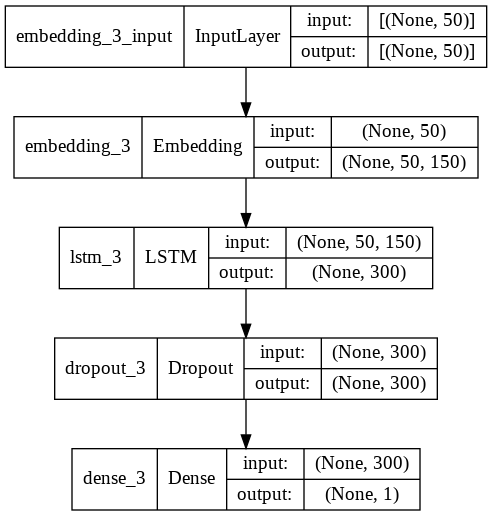

In [213]:
from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes= True)

In [214]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 150)           1500000   
                                                                 
 lstm_3 (LSTM)               (None, 300)               541200    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 2,041,501
Trainable params: 2,041,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
125/125 [==============================] - 82s 634ms/step - loss: 0.4745 - accuracy: 0.7652 - val_loss: 0.3249 - val_accuracy: 0.8610
Epoch 2/5
125/125 [========

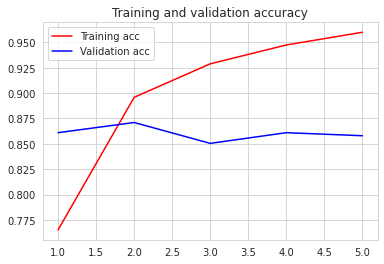

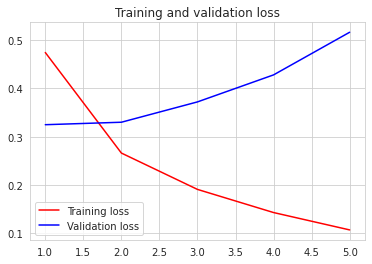

In [215]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()